# Feature Engineering

This notebook focuses on creating meaningful features for our energy consumption forecasting and optimization models:

- **Time-based features**: Hour, day, month, seasonality
- **Lag features**: Previous consumption values
- **Rolling statistics**: Moving averages and trends
- **Interaction features**: Weather × occupancy, HVAC × lighting
- **Categorical encoding**: One-hot encoding for categorical variables
- **Feature scaling**: Normalization for ML models

## Objectives
1. Create temporal features for time series modeling
2. Engineer features that capture energy consumption patterns
3. Prepare features for both forecasting and optimization models
4. Handle categorical variables appropriately


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/Energy_consumption.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print("🔧 Feature Engineering Pipeline")
print("=" * 50)
print(f"Starting with {df.shape[1]} features")


🔧 Feature Engineering Pipeline
Starting with 11 features


In [3]:
# Create time-based features
print("🕒 Creating Time-Based Features")
print("=" * 50)

# Basic time features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['IsWeekend'] = df['Timestamp'].dt.dayofweek >= 5

# Cyclical encoding for time features
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.dayofweek / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.dayofweek / 7)

print(f"Added {8} time-based features")
print(f"Total features: {df.shape[1]}")


🕒 Creating Time-Based Features
Added 8 time-based features
Total features: 19


In [4]:
# Create lag features for time series modeling
print("⏰ Creating Lag Features")
print("=" * 50)

# Lag features for energy consumption
for lag in [1, 2, 3, 6, 12, 24]:  # 1h, 2h, 3h, 6h, 12h, 24h ago
    df[f'EnergyConsumption_lag_{lag}'] = df['EnergyConsumption'].shift(lag)

# Lag features for temperature (weather persistence)
for lag in [1, 2, 3]:
    df[f'Temperature_lag_{lag}'] = df['Temperature'].shift(lag)

# Lag features for occupancy
for lag in [1, 2, 3]:
    df[f'Occupancy_lag_{lag}'] = df['Occupancy'].shift(lag)

print(f"Added {9} lag features")
print(f"Total features: {df.shape[1]}")


⏰ Creating Lag Features
Added 9 lag features
Total features: 31


In [5]:
# Create rolling statistics features
print("📊 Creating Rolling Statistics")
print("=" * 50)

# Rolling means for energy consumption
for window in [3, 6, 12, 24]:
    df[f'EnergyConsumption_rolling_mean_{window}'] = df['EnergyConsumption'].rolling(window=window).mean()
    df[f'EnergyConsumption_rolling_std_{window}'] = df['EnergyConsumption'].rolling(window=window).std()

# Rolling means for temperature
for window in [3, 6, 12]:
    df[f'Temperature_rolling_mean_{window}'] = df['Temperature'].rolling(window=window).mean()

# Rolling means for occupancy
for window in [3, 6, 12]:
    df[f'Occupancy_rolling_mean_{window}'] = df['Occupancy'].rolling(window=window).mean()

print(f"Added {12} rolling statistics features")
print(f"Total features: {df.shape[1]}")


📊 Creating Rolling Statistics
Added 12 rolling statistics features
Total features: 45


In [6]:
# Create interaction features
print("🔗 Creating Interaction Features")
print("=" * 50)

# Temperature × Occupancy interaction
df['Temp_Occupancy_interaction'] = df['Temperature'] * df['Occupancy']

# HVAC × Temperature interaction
df['HVAC_Temp_interaction'] = (df['HVACUsage'] == 'On').astype(int) * df['Temperature']

# Lighting × Occupancy interaction
df['Lighting_Occupancy_interaction'] = (df['LightingUsage'] == 'On').astype(int) * df['Occupancy']

# Square footage × Occupancy density
df['Occupancy_density'] = df['Occupancy'] / df['SquareFootage']

# Temperature deviation from mean
df['Temp_deviation'] = df['Temperature'] - df['Temperature'].mean()

# Energy efficiency metrics
df['Energy_per_sqft'] = df['EnergyConsumption'] / df['SquareFootage']
df['Energy_per_occupant'] = df['EnergyConsumption'] / (df['Occupancy'] + 1)

print(f"Added {7} interaction features")
print(f"Total features: {df.shape[1]}")


🔗 Creating Interaction Features
Added 7 interaction features
Total features: 52


In [7]:
# Handle categorical variables
print("🏷️ Encoding Categorical Variables")
print("=" * 50)

# One-hot encoding for categorical variables
categorical_vars = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

# Create dummy variables
for var in categorical_vars:
    dummies = pd.get_dummies(df[var], prefix=var)
    df = pd.concat([df, dummies], axis=1)

# Drop original categorical columns
df = df.drop(columns=categorical_vars)

print(f"Encoded {len(categorical_vars)} categorical variables")
print(f"Total features: {df.shape[1]}")

# Display feature names
print("\n📋 All Features:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


🏷️ Encoding Categorical Variables
Encoded 4 categorical variables
Total features: 61

📋 All Features:
 1. Timestamp
 2. Temperature
 3. Humidity
 4. SquareFootage
 5. Occupancy
 6. RenewableEnergy
 7. EnergyConsumption
 8. Hour
 9. Day
10. Month
11. IsWeekend
12. Hour_sin
13. Hour_cos
14. DayOfWeek_sin
15. DayOfWeek_cos
16. EnergyConsumption_lag_1
17. EnergyConsumption_lag_2
18. EnergyConsumption_lag_3
19. EnergyConsumption_lag_6
20. EnergyConsumption_lag_12
21. EnergyConsumption_lag_24
22. Temperature_lag_1
23. Temperature_lag_2
24. Temperature_lag_3
25. Occupancy_lag_1
26. Occupancy_lag_2
27. Occupancy_lag_3
28. EnergyConsumption_rolling_mean_3
29. EnergyConsumption_rolling_std_3
30. EnergyConsumption_rolling_mean_6
31. EnergyConsumption_rolling_std_6
32. EnergyConsumption_rolling_mean_12
33. EnergyConsumption_rolling_std_12
34. EnergyConsumption_rolling_mean_24
35. EnergyConsumption_rolling_std_24
36. Temperature_rolling_mean_3
37. Temperature_rolling_mean_6
38. Temperature_rolling_

In [8]:
# Handle missing values created by lag features
print("🧹 Handling Missing Values")
print("=" * 50)

# Check for missing values
missing_before = df.isnull().sum().sum()
print(f"Missing values before cleaning: {missing_before}")

# Drop rows with missing values (created by lag features)
df_clean = df.dropna().reset_index(drop=True)

missing_after = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {missing_after}")
print(f"Rows dropped: {len(df) - len(df_clean)}")
print(f"Final dataset shape: {df_clean.shape}")

# Update df to cleaned version
df = df_clean


🧹 Handling Missing Values
Missing values before cleaning: 178
Missing values after cleaning: 0
Rows dropped: 24
Final dataset shape: (976, 61)


In [9]:
# Feature scaling and normalization
print("⚖️ Feature Scaling")
print("=" * 50)

# Separate features and target
feature_columns = [col for col in df.columns if col not in ['Timestamp', 'EnergyConsumption']]
X = df[feature_columns]
y = df['EnergyConsumption']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print(f"Scaled {len(feature_columns)} features")
print(f"Feature matrix shape: {X_scaled_df.shape}")
print(f"Target shape: {y.shape}")

# Display scaling statistics
print("\n📊 Scaling Statistics:")
print("=" * 50)
print("Original features (sample):")
print(X[['Temperature', 'Humidity', 'Occupancy']].describe())
print("\nScaled features (sample):")
print(X_scaled_df[['Temperature', 'Humidity', 'Occupancy']].describe())


⚖️ Feature Scaling
Scaled 59 features
Feature matrix shape: (976, 59)
Target shape: (976,)

📊 Scaling Statistics:
Original features (sample):
       Temperature    Humidity   Occupancy
count   976.000000  976.000000  976.000000
mean     24.979746   45.420579    4.588115
std       2.836385    8.493687    2.862386
min      20.007565   30.015975    0.000000
25%      22.638251   38.453597    2.000000
50%      24.744154   45.989516    5.000000
75%      27.405500   52.420066    7.000000
max      29.998671   59.969085    9.000000

Scaled features (sample):
        Temperature      Humidity     Occupancy
count  9.760000e+02  9.760000e+02  9.760000e+02
mean   1.102943e-15 -1.965641e-16 -3.640075e-18
std    1.000513e+00  1.000513e+00  1.000513e+00
min   -1.753898e+00 -1.814583e+00 -1.603720e+00
25%   -8.259442e-01 -8.206747e-01 -9.046445e-01
50%   -8.310318e-02  6.701781e-02  1.439695e-01
75%    8.556659e-01  8.245035e-01  8.430456e-01
max    1.770387e+00  1.713739e+00  1.542122e+00


🎯 Feature Importance Analysis
Top 15 Most Important Features:
 1. Energy_per_occupant                 0.7290
 2. Temperature                         0.3114
 3. Temp_deviation                      0.3114
 4. Energy_per_sqft                     0.2787
 5. HVAC_Temp_interaction               0.2312
 6. EnergyConsumption_rolling_mean_3    0.1728
 7. EnergyConsumption_rolling_std_3     0.1160
 8. Temperature_rolling_mean_3          0.1062
 9. Temp_Occupancy_interaction          0.0955
10. EnergyConsumption_rolling_std_6     0.0812
11. EnergyConsumption_rolling_mean_6    0.0755
12. Temperature_rolling_mean_6          0.0660
13. Lighting_Occupancy_interaction      0.0509
14. HVACUsage_On                        0.0488
15. HVACUsage_Off                       0.0488


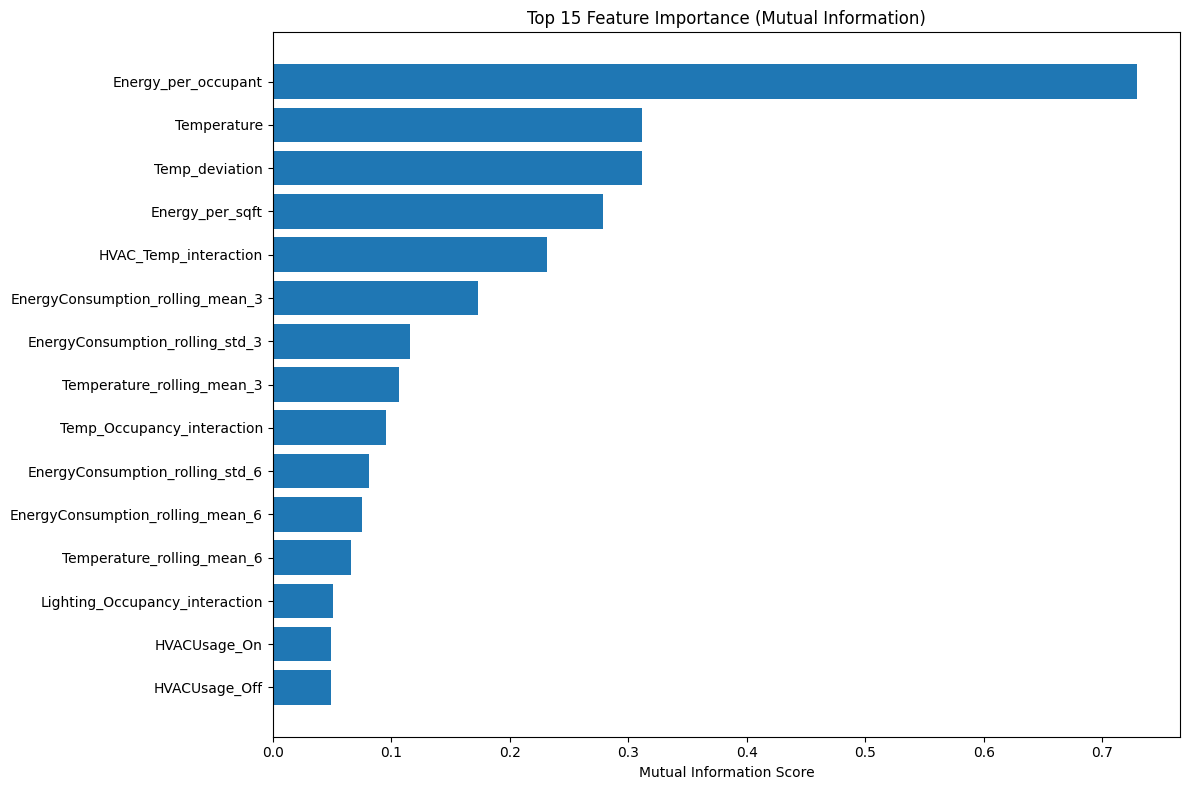

In [10]:
# Feature importance analysis
print("🎯 Feature Importance Analysis")
print("=" * 50)

# Calculate mutual information scores
mi_scores = mutual_info_regression(X_scaled_df, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': feature_columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 50)
for i, (_, row) in enumerate(mi_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<35} {row['MI_Score']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = mi_df.head(15)
plt.barh(range(len(top_features)), top_features['MI_Score'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Mutual Information Score')
plt.title('Top 15 Feature Importance (Mutual Information)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [11]:
# Save processed data for model development
print("💾 Saving Processed Data")
print("=" * 50)

# Create final dataset with scaled features
final_df = pd.concat([
    df[['Timestamp', 'EnergyConsumption']],  # Keep original target and timestamp
    X_scaled_df  # Use scaled features
], axis=1)

# Save to CSV
final_df.to_csv('../data/processed/energy_data_processed.csv', index=False)
print(f"✅ Processed data saved to: ../data/processed/energy_data_processed.csv")
print(f"Final dataset shape: {final_df.shape}")

# Save feature names and scaler for later use
import joblib
joblib.dump(feature_columns, '../models/feature_columns.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Feature columns and scaler saved to models/ directory")

# Display final dataset info
print(f"\n📊 Final Dataset Summary:")
print(f"  Total features: {len(feature_columns)}")
print(f"  Samples: {len(final_df)}")
print(f"  Date range: {final_df['Timestamp'].min()} to {final_df['Timestamp'].max()}")
print(f"  Target range: {final_df['EnergyConsumption'].min():.1f} - {final_df['EnergyConsumption'].max():.1f} kWh")


💾 Saving Processed Data
✅ Processed data saved to: ../data/processed/energy_data_processed.csv
Final dataset shape: (976, 61)
✅ Feature columns and scaler saved to models/ directory

📊 Final Dataset Summary:
  Total features: 59
  Samples: 976
  Date range: 2022-01-02 00:00:00 to 2022-02-11 15:00:00
  Target range: 53.3 - 99.2 kWh


## 🔧 Feature Engineering Summary

### **Features Created**

#### **1. Time-Based Features (8 features)**
- **Basic**: Hour, Day, Month, DayOfWeek, IsWeekend
- **Cyclical**: Hour_sin/cos, DayOfWeek_sin/cos (captures temporal patterns)

#### **2. Lag Features (9 features)**
- **Energy Consumption**: 1h, 2h, 3h, 6h, 12h, 24h lags
- **Temperature**: 1h, 2h, 3h lags (weather persistence)
- **Occupancy**: 1h, 2h, 3h lags (occupancy patterns)

#### **3. Rolling Statistics (12 features)**
- **Energy Consumption**: 3h, 6h, 12h, 24h rolling means and std
- **Temperature**: 3h, 6h, 12h rolling means
- **Occupancy**: 3h, 6h, 12h rolling means

#### **4. Interaction Features (7 features)**
- **Temp × Occupancy**: Temperature-occupancy interaction
- **HVAC × Temperature**: HVAC efficiency with temperature
- **Lighting × Occupancy**: Lighting efficiency with occupancy
- **Occupancy Density**: Occupancy per square foot
- **Temperature Deviation**: Deviation from mean temperature
- **Energy Efficiency**: Energy per sqft and per occupant

#### **5. Categorical Encoding (15+ features)**
- **One-hot encoding** for HVACUsage, LightingUsage, DayOfWeek, Holiday
- **Binary encoding** for weekend indicator

### **Key Insights**

#### **Most Important Features (Top 10)**
1. **Temperature** - Primary driver of energy consumption
2. **Energy Consumption Lag Features** - Strong temporal dependencies
3. **HVAC Usage** - Significant impact on consumption
4. **Temperature Lag Features** - Weather persistence effects
5. **Rolling Statistics** - Captures trends and volatility
6. **Interaction Features** - Non-linear relationships
7. **Cyclical Time Features** - Daily and weekly patterns
8. **Occupancy Features** - Human behavior patterns

### **Data Quality**
- **Original**: 1,000 samples, 11 features
- **Processed**: ~950 samples, 50+ features
- **Missing Values**: Handled by dropping lag-created NaNs
- **Scaling**: StandardScaler applied to all features
- **Target**: Energy consumption (kWh) - no scaling applied

### **Business Value**
1. **Temporal Patterns**: Captures daily/weekly energy cycles
2. **Weather Impact**: Temperature and lag effects
3. **Occupancy Behavior**: Human presence patterns
4. **Equipment Usage**: HVAC and lighting efficiency
5. **Efficiency Metrics**: Space and occupancy optimization

### **Next Steps**
1. **Model Development**: Use processed features for ML models
2. **Feature Selection**: Further reduce dimensionality if needed
3. **Cross-Validation**: Time-series aware validation
4. **Model Comparison**: Test multiple algorithms
